In [2]:
### Importing Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler

### Loading dataset
df = pd.read_csv("Brainstroke dataset.csv")
#print(df)

### Converting Text into Numericals
d1 = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(d1)
d2 = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(d2)
d3 = {'Private': 1, 'Self-employed': 0, 'Govt_job':2, 'children':3}
df['work_type'] = df['work_type'].map(d3)
d4 = {'Rural': 1, 'Urban': 0}
df['Residence_type'] = df['Residence_type'].map(d4)
d5 = {'smokes': 1, 'never smoked': 0,'formerly smoked':2,'Unknown':3}
df['smoking_status'] = df['smoking_status'].map(d5)
print(df)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             1          1   
1          0  80.0             0              1             1          1   
2          1  49.0             0              0             1          1   
3          1  79.0             1              0             1          0   
4          0  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       0  41.0             0              0             0          1   
4977       0  40.0             0              0             1          1   
4978       1  45.0             1              0             1          2   
4979       0  40.0             0              0             1          1   
4980       1  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [3]:
features = ['gender','age', 'hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

X = df[features]
Y = df['stroke']
#print(X)
#print(Y)
nan_count = X.isna().sum().sum()
print(nan_count)

0


In [4]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, Y)


In [5]:
np.random.seed(1)
sample_size = round(df.shape[0] * 0.5)
df_train = df.sample(sample_size)
df_test = df.drop(df_train.index)
#print(df_train)

Y_train = df_train["stroke"]
X_train= df_train.drop(["stroke"], axis = 1)
print(X_train)

Y_test = df_test["stroke"]
X_test= df_test.drop(["stroke"], axis = 1)
print(X_test)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
2753       0  59.0             0              0             1          2   
573        0  57.0             0              0             1          1   
1179       1  80.0             0              0             1          0   
2155       1  69.0             0              1             0          1   
348        1  75.0             0              0             1          0   
...      ...   ...           ...            ...           ...        ...   
614        1   2.0             0              0             0          3   
1760       1  45.0             0              0             1          1   
91         1  53.0             0              0             1          2   
1644       1  48.0             0              0             1          2   
4142       1  79.0             1              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2753               0   

In [6]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
X_testresampled, y_testresampled = rus.fit_resample(X_test, Y_test)

In [7]:
print(y_testresampled)

0      0
1      0
2      0
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: stroke, Length: 254, dtype: int64


In [8]:


dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)



In [9]:
#print(X_train)
print(Y_train)

2753    0
573     0
1179    0
2155    0
348     0
       ..
614     0
1760    0
91      1
1644    0
4142    0
Name: stroke, Length: 2490, dtype: int64


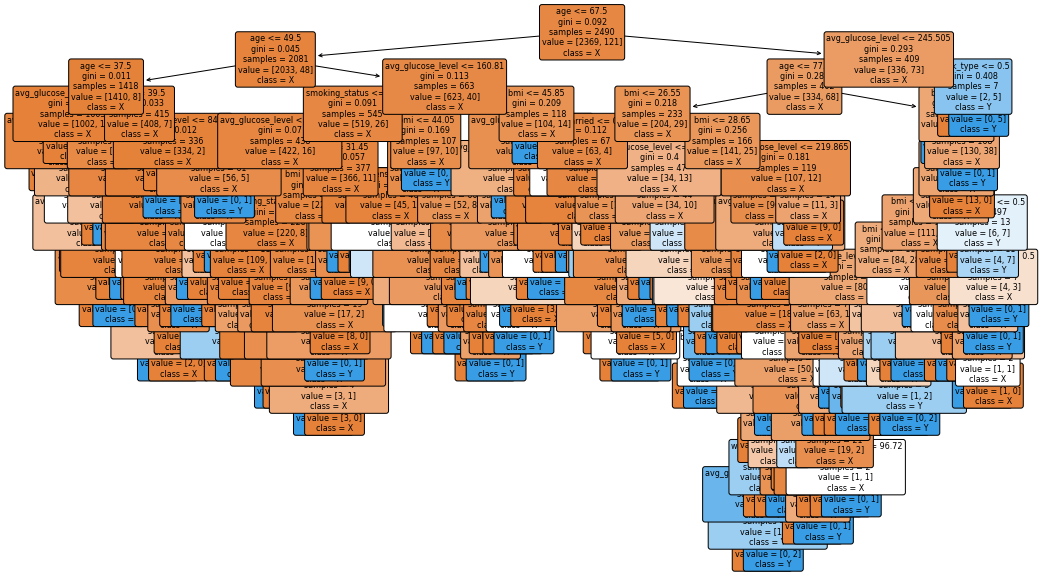

In [10]:
plt.figure(figsize=(17, 10))
tree.plot_tree(dtree, feature_names = X_train.columns, filled = True,class_names = ["X","Y"], rounded = True, fontsize = 8)
plt.show()

In [11]:
train_err = 1 - dtree.score(X_train, Y_train)
np.round(train_err, 3)
dtree.tree_.n_leaves

181

In [12]:
predictions = dtree.predict(X_test)
matrix = confusion_matrix(Y_test, predictions)
print(matrix)

def diagonal_sum(matrix):
  sum = 0
  for i in range(2):
    for j in range(2):
      if i==j: sum+= matrix[i,j]
  return sum
sum2 = diagonal_sum(matrix)
DTree_Accuracy=(sum2/2491)*100
print(f'Decision Tree Accuracy: {DTree_Accuracy}')

[[2235  129]
 [ 104   23]]
Decision Tree Accuracy: 90.64632677639503


In [13]:
cv_folds = 14
results = []
for t_nodes in np.arange(2, 9):
    dtree = DecisionTreeClassifier(max_leaf_nodes = t_nodes)
    score = cross_val_score(dtree, X_train, Y_train, scoring = "neg_mean_squared_error", cv = cv_folds)
    results += [[t_nodes, -np.mean(score)]]

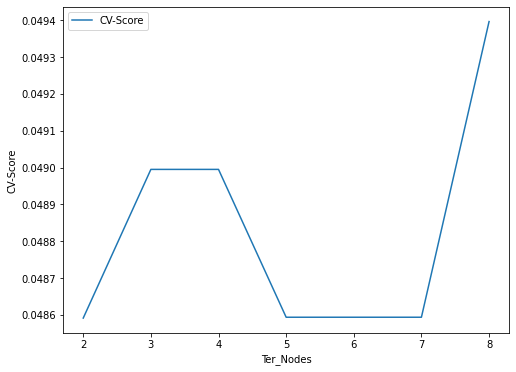

In [14]:
plt.figure(figsize=(8, 6))
plot_df = pd.DataFrame(np.asarray(results), columns=['Ter_Nodes', 'CV-Score']).set_index('Ter_Nodes')
sns.lineplot(data = plot_df);
plt.ylabel('CV-Score')
plt.show();

In [15]:
t_node_opt = plot_df[plot_df['CV-Score'] == plot_df['CV-Score'].min()]
t_node_opt

,CV-Score
Ter_Nodes,
2.0,0.048592


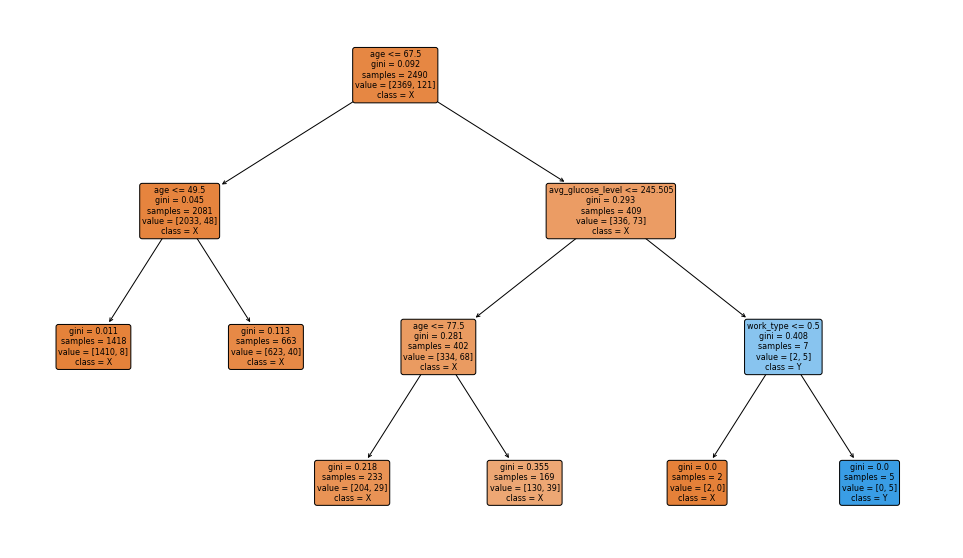

In [16]:
prune_dtree = DecisionTreeClassifier(max_leaf_nodes = 6)
prune_dtree = prune_dtree.fit(X_train, Y_train)
plt.figure(figsize=(17, 10))
tree.plot_tree(prune_dtree, feature_names = X_train.columns, filled = True,class_names = ["X","Y"], rounded = True, fontsize = 8)
plt.show()

In [17]:
predictions = prune_dtree.predict(X_test)
matrix = confusion_matrix(Y_test, predictions)
print(matrix)

def diagonal_sum(matrix):
  sum = 0
  for i in range(2):
    for j in range(2):
      if i==j: sum+= matrix[i,j]
  return sum
sum2 = diagonal_sum(matrix)
Prune_Accuracy=(sum2/2491)*100
print(f'Prune Tree Accuracy: {Prune_Accuracy}')

[[2358    6]
 [ 127    0]]
Prune Tree Accuracy: 94.66077880369329


In [18]:
bagging_dtree = BaggingClassifier(base_estimator=dtree, n_estimators=1500, random_state=42)
bagging_dtree.fit(X_train, Y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=8),
                  n_estimators=1500, random_state=42)

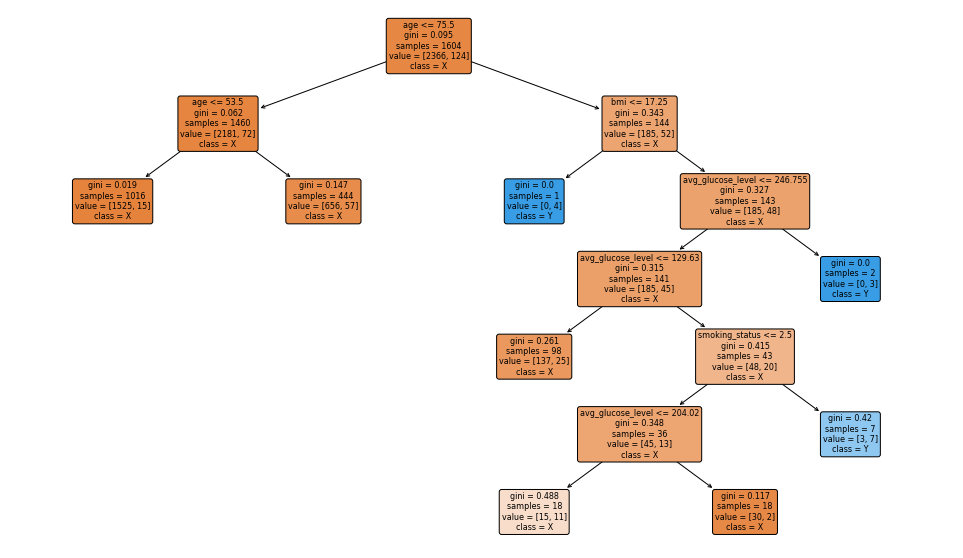

In [19]:
plt.figure(figsize=(17, 10))
tree.plot_tree(bagging_dtree.estimators_[0], feature_names = X_train.columns, filled = True,class_names = ["X","Y"], rounded = True, fontsize = 8)
plt.show()

In [20]:
predictions = bagging_dtree.predict(X_test)
matrix = confusion_matrix(Y_test, predictions)
print(matrix)
def diagonal_sum(matrix):
  sum = 0
  for i in range(2):
    for j in range(2):
      if i==j: sum+= matrix[i,j]
  return sum
sum2 = diagonal_sum(matrix)
Bagging_Accuracy=(sum2/2491)*100
print(f'Bagging Tree Accuracy: {Bagging_Accuracy}')

[[2360    4]
 [ 127    0]]
Bagging Tree Accuracy: 94.74106784423925


In [21]:
rf_dtree = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_dtree.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

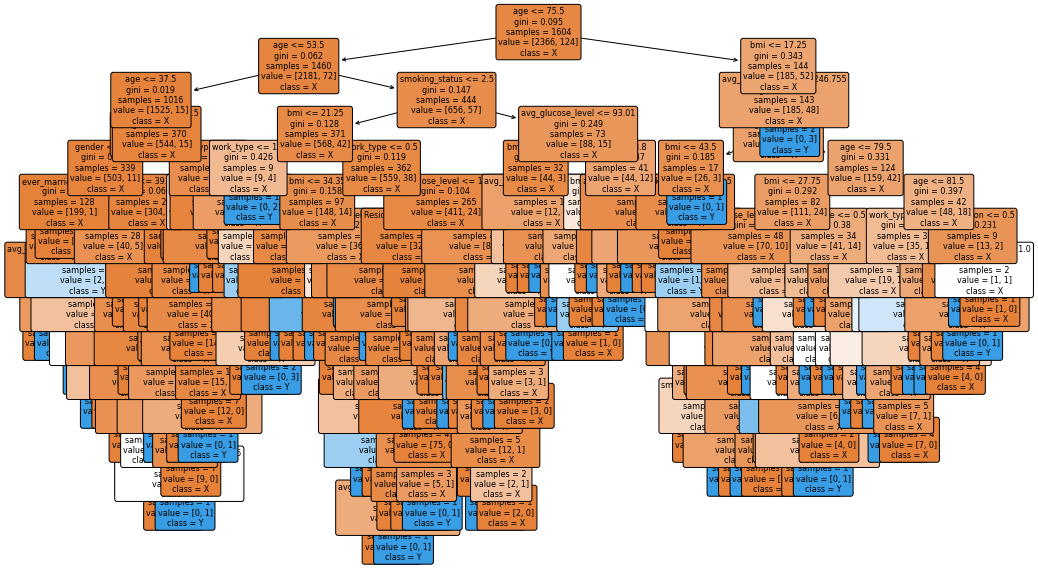

In [22]:
plt.figure(figsize=(17, 10))
tree.plot_tree(rf_dtree.estimators_[0], feature_names = X_train.columns, filled = True,class_names = ["X","Y"], rounded = True, fontsize = 8)
plt.show()

In [23]:
predictions = rf_dtree .predict(X_test)
matrix = confusion_matrix(Y_test, predictions)
print(matrix)
def diagonal_sum(matrix):
  sum = 0
  for i in range(2):
    for j in range(2):
      if i==j: sum+= matrix[i,j]
  return sum
sum2 = diagonal_sum(matrix)
RF_Accuracy=(sum2/2491)*100
print(f'Random Forest Accuracy: {RF_Accuracy}')

[[2361    3]
 [ 127    0]]
Random Forest Accuracy: 94.78121236451224


In [24]:
boost_dtree = AdaBoostClassifier(n_estimators=1000)
boost_dtree.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=1000)

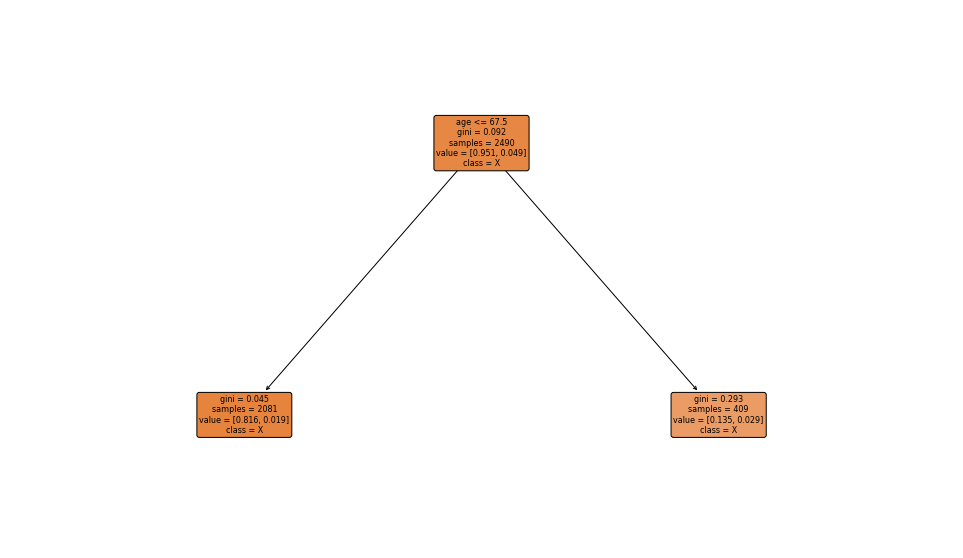

In [25]:
plt.figure(figsize=(17, 10))
tree.plot_tree(boost_dtree.estimators_[0], feature_names = X_train.columns, filled = True,class_names = ["X","Y"], rounded = True, fontsize = 8)
plt.show()

In [26]:
predictions = boost_dtree .predict(X_test)
matrix = confusion_matrix(Y_test, predictions)
#print(matrix)
def diagonal_sum(matrix):
  sum = 0
  for i in range(2):
    for j in range(2):
      if i==j: sum+= matrix[i,j]
  return sum
sum2 = diagonal_sum(matrix)
Boost_Accuracy=(sum2/2491)*100
print(f'Boosting Accuracy: {Boost_Accuracy}')

Boosting Accuracy: 94.09875551987153


In [27]:
model_dict = {'Model': ['Decision Tree', 'Prune Decision Tree','Bagging Tree','Random Forest','Boosting'], 'Accuracy': [DTree_Accuracy, Prune_Accuracy, Bagging_Accuracy, RF_Accuracy, Boost_Accuracy]}
df1 = pd.DataFrame(model_dict)
print(df1)


                 Model   Accuracy
0        Decision Tree  90.646327
1  Prune Decision Tree  94.660779
2         Bagging Tree  94.741068
3        Random Forest  94.781212
4             Boosting  94.098756


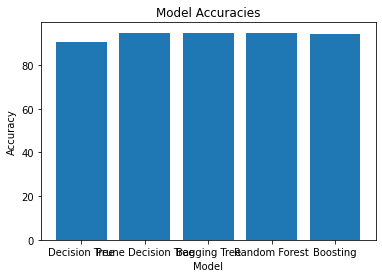

In [28]:
plt.bar(df1['Model'], df1['Accuracy']) 
plt.title('Model Accuracies') 
plt.xlabel('Model') 
plt.ylabel('Accuracy') 
plt.show()